Oksana Harapyn (14711133)
Danylo Redka (14795051)
Sergey Romadin(14988585)

In [1]:
# DATA ANALYSIS (1)

In [2]:
#imported modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
#data itself
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

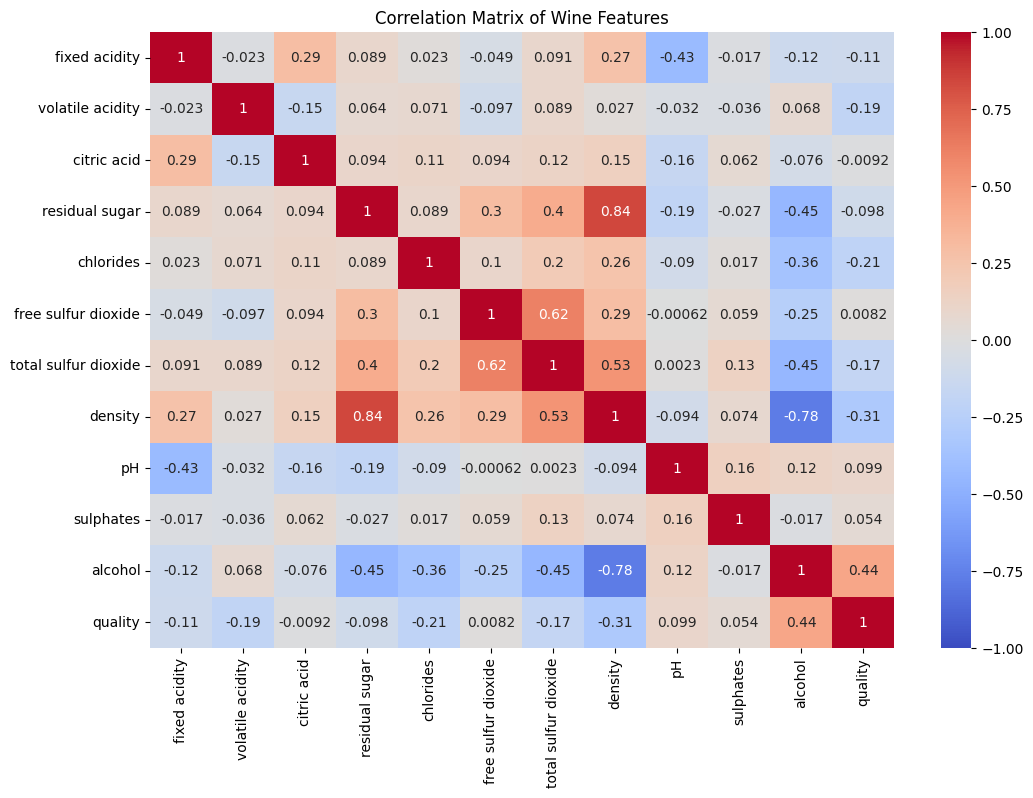

In [4]:
#correlation between features in white wine
plt.figure(figsize=(12, 8))
correlation_matrix = white_wine.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Features')
plt.show()

**White wines have significant positive correlation between quality and alcohol, other features barely have positive effect on quality. At the same time quality is negatively correlated with density, chlorides, volatile acidity.**

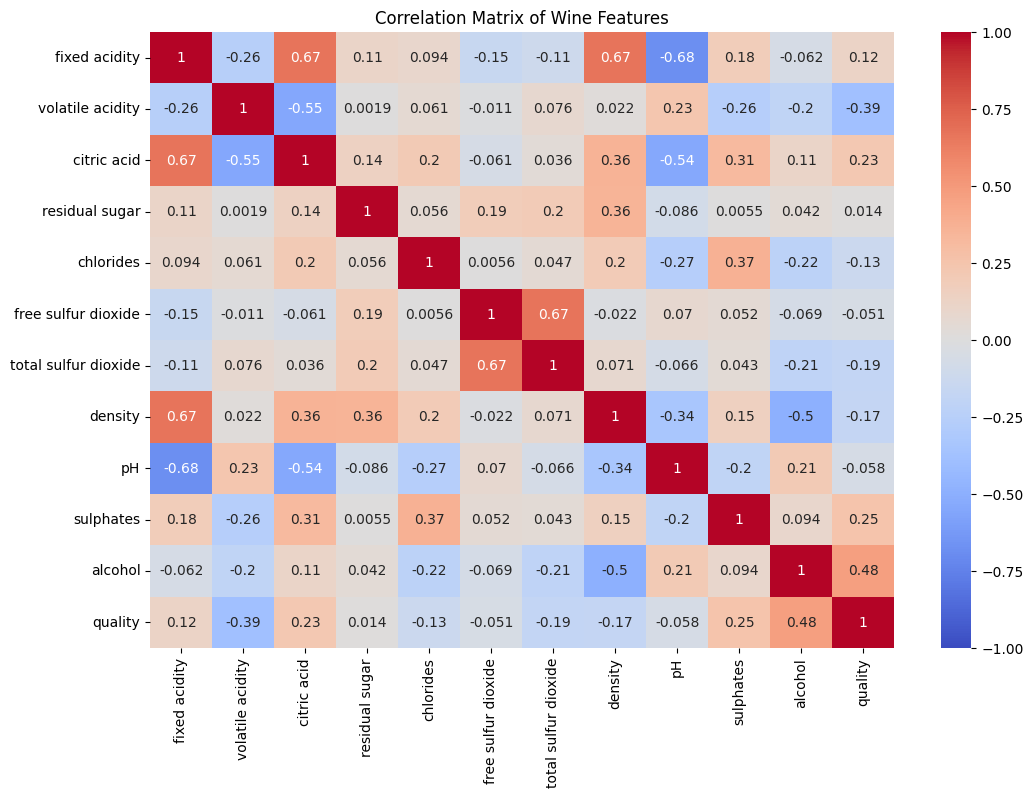

In [5]:
#correlation between features in red wine
plt.figure(figsize=(12, 8))
correlation_matrix = red_wine.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Features')
plt.show()

**Red wines have significant positive correlation between quality and alcohol, sulphates, citric acid, fixed acidity. At the same time quality is negatively correlated with volatile acidity, total sulfur dioxide, density.**

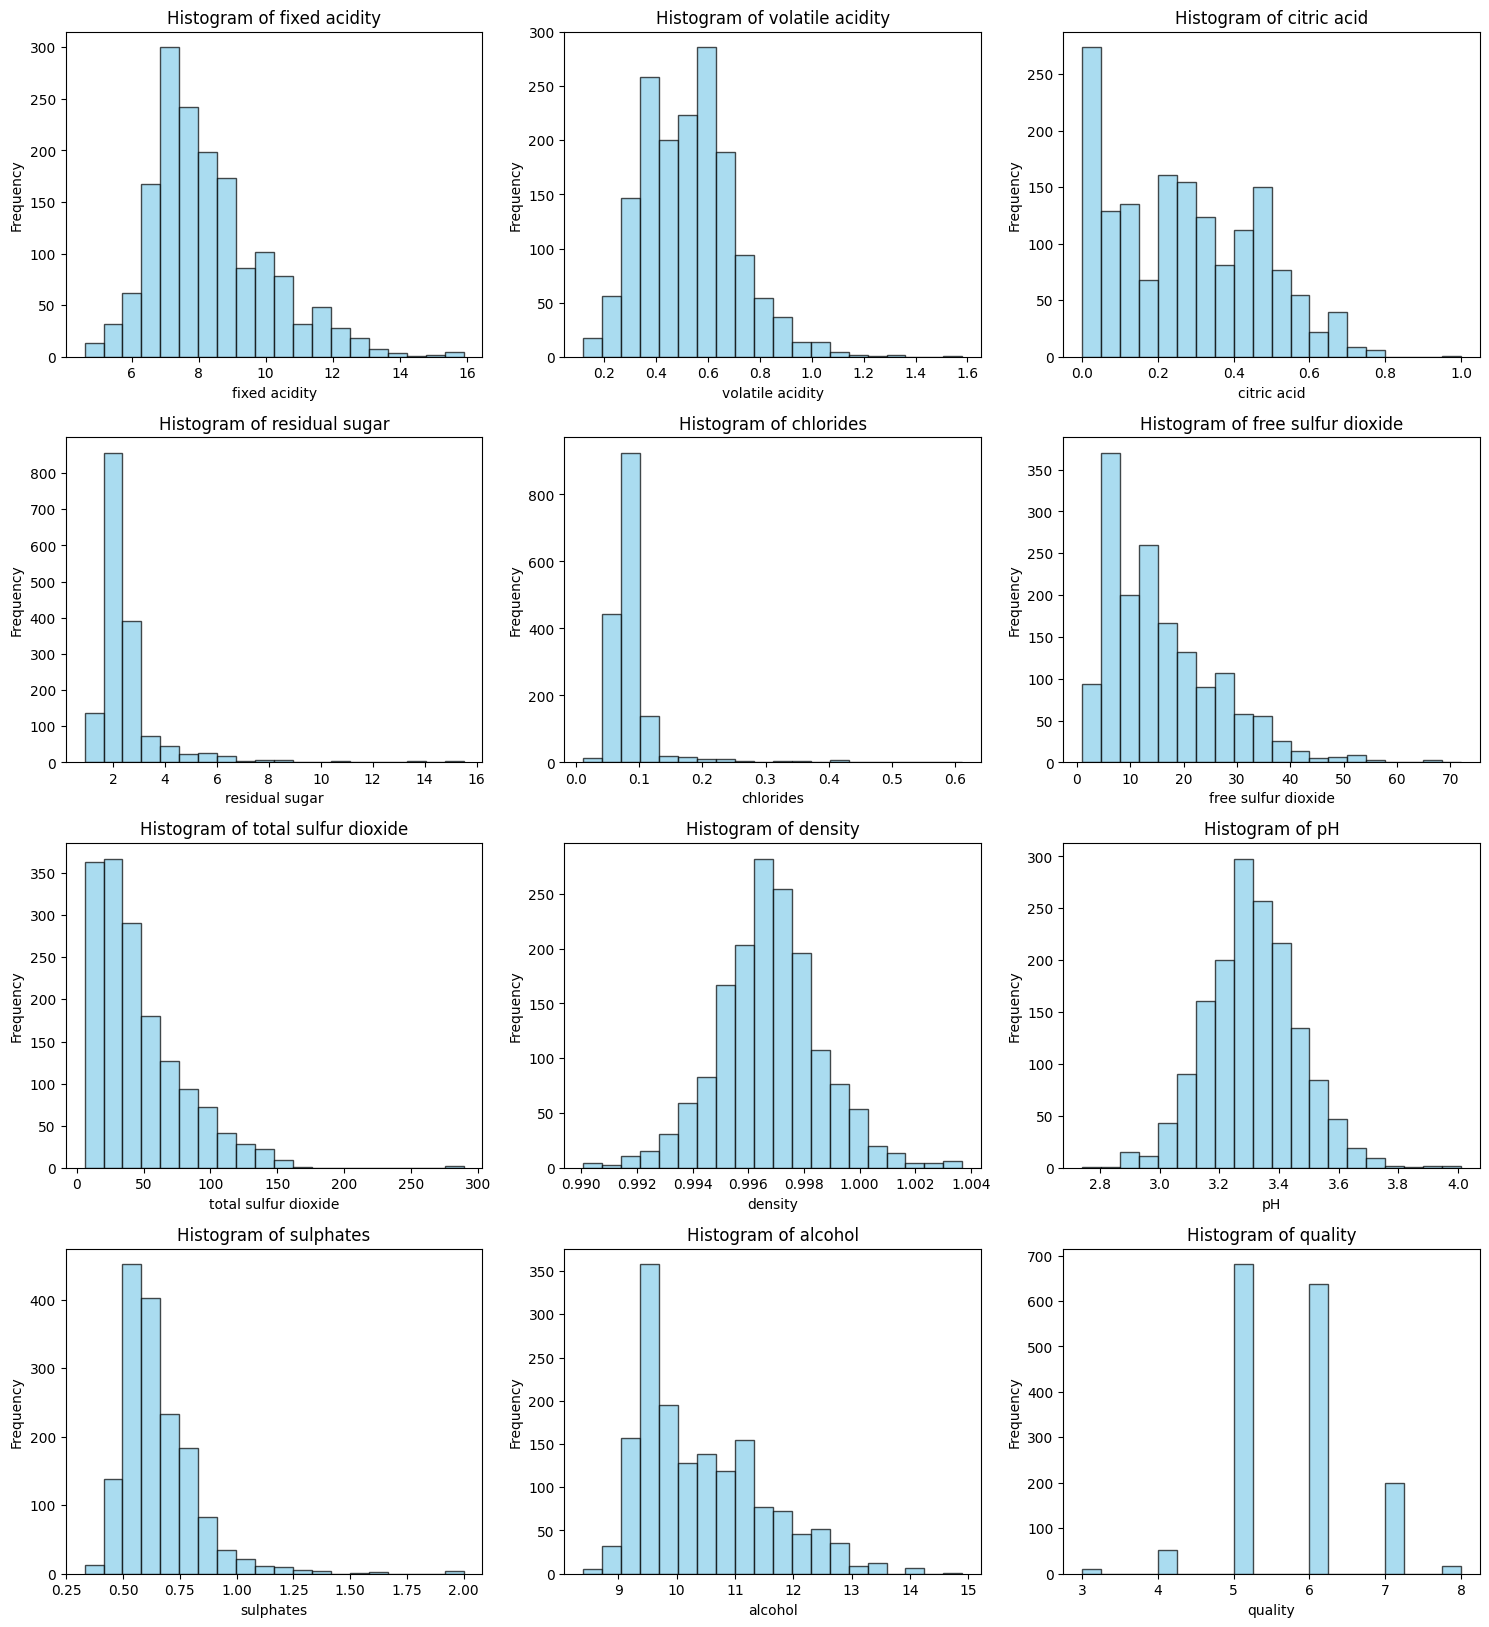

In [6]:
#features red wine
num_features = len(red_wine.columns)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, column in enumerate(red_wine.columns):
    axes[i].hist(red_wine[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**On the graphs above one can see frequency tables for each feature of the red wine data. Interestingly enough, most of the graphs are skewed to the left. However, quality, pH and density are more evenely distributed, where mean and median have less deviation.**

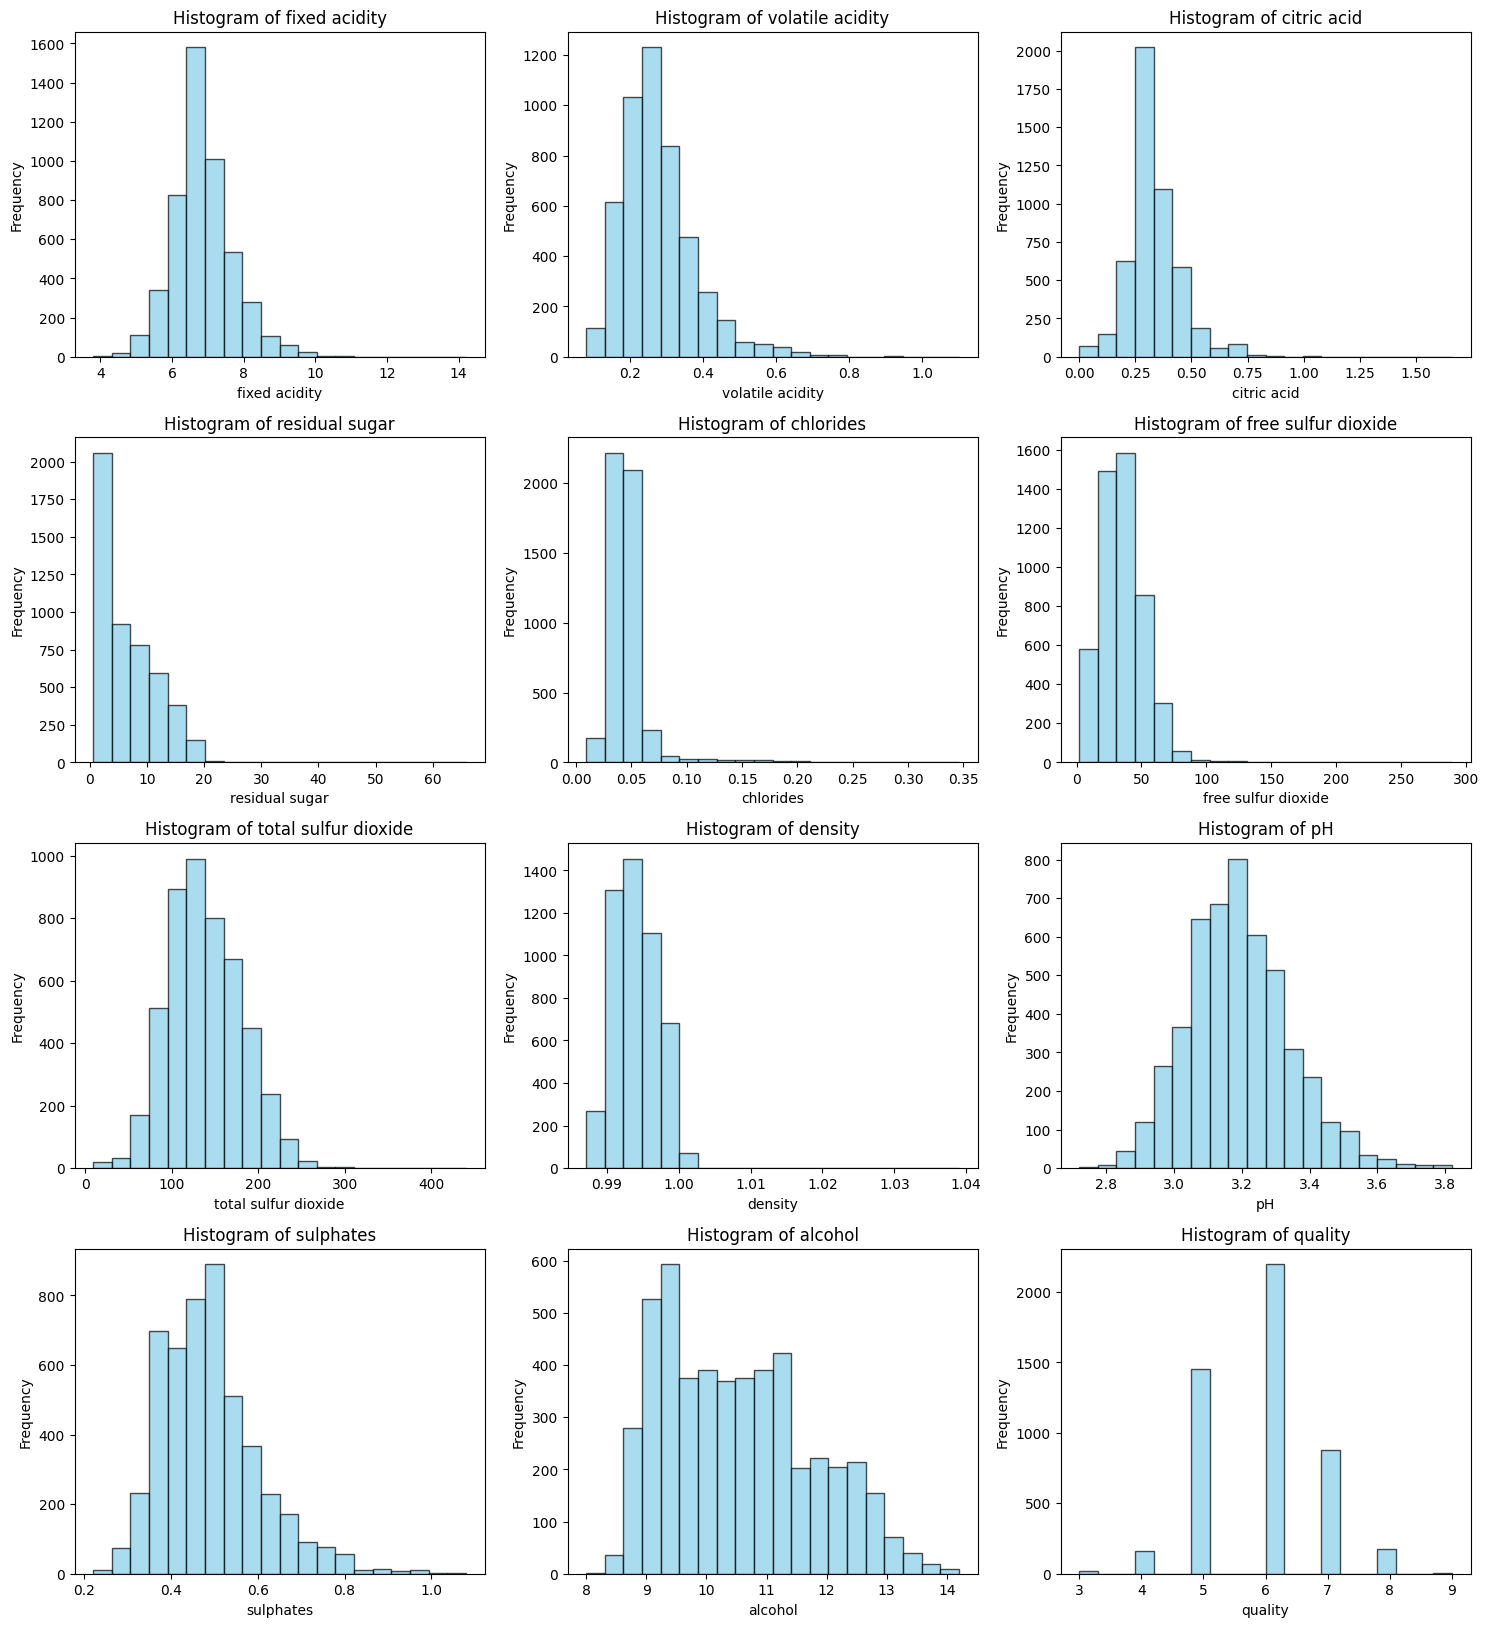

In [7]:
#features white wine
num_features = len(white_wine.columns)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, column in enumerate(white_wine.columns):
    axes[i].hist(white_wine[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**On the histograms for white wine we can see rather same properties as on histograms for red wine.**

**Overall, based on quality histogram we could conclude that white wine performs better. It was also found that there is significant correlation between quality and some features. Nevertheless, wine types share distribution features that can be read from histograms and heatmaps.**

In [ ]:
# CLOSED-FORM OSL SOLUTION (2)

In [ ]:
n_samples = 100
n_features = 10
X, Y, coeffs = make_regression(n_samples=n_samples, n_features=n_features, noise=0.1, coef=True)

X_transpose = X.T
beta_ols = np.linalg.inv(X_transpose @ X) @ X_transpose @ Y

print(coeffs)
print(beta_ols)

are_coeffs_close = np.allclose(beta_ols, coeffs)
print(are_coeffs_close)

[35.3668758  68.67542173 92.93873075 23.73708296 11.20117656 88.11738729
 37.02155895 66.70379507 67.42670873 37.17988742]
[35.36850219 68.67487431 92.93587905 23.73367596 11.18038789 88.12963955
 37.007911   66.7017335  67.43149085 37.191684  ]
False


**One significant shortcoming of the closed-form solution in ordinary least squares is computational complexity, especially with a large number of features. Calculating involves matrix inversion, which has a time complexity of O(n^3), where n is the number of features. This can lead to increased computation time and memory usage.**

In [ ]:
# WINE QUALITY REGRESSION (3)

OLS Regression Results:
MSE: 0.5412384543695578
MAE: 0.5644129055666046
R^2: 0.26715748512627346

Ridge Regression Results:
Best alpha: 0.001
MSE: 0.5418104375442746
MAE: 0.5647633044087589
R^2: 0.2663830139392377

Lasso Regression Results:
Best alpha: 0.001
MSE: 0.5460787112956248
MAE: 0.5683428444752668
R^2: 0.26060372674178145

ElasticNet Regression Results:
Best alpha: 0.001
Best l1_ratio: 0.1
MSE: 0.5458207952677052
MAE: 0.5675818232190928
R^2: 0.26095294773485933


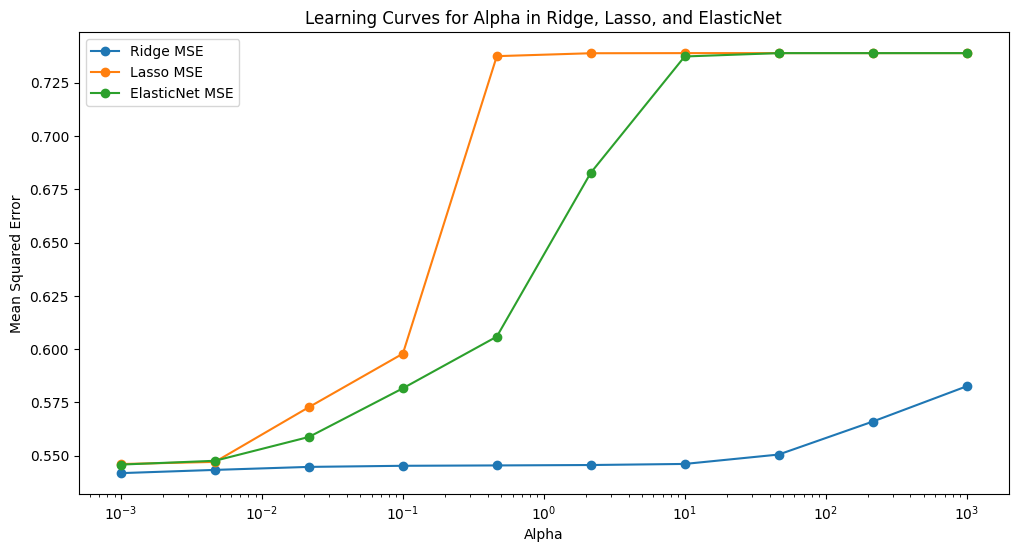

In [9]:
red_wine['type'] = 1
white_wine['type'] = 0
df = pd.concat([red_wine, white_wine], axis=0)

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

y_pred_ols = ols_model.predict(X_test)
mse_ols = mean_squared_error(y_test, y_pred_ols)
mae_ols = mean_absolute_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print("OLS Regression Results:")
print("MSE:", mse_ols)
print("MAE:", mae_ols)
print("R^2:", r2_ols)

ridge_params = {'alpha': np.logspace(-3, 3, 10)}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

ridge_best = ridge_grid.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Results:")
print("Best alpha:", ridge_grid.best_params_['alpha'])
print("MSE:", mse_ridge)
print("MAE:", mae_ridge)
print("R^2:", r2_ridge)

lasso_params = {'alpha': np.logspace(-3, 3, 10)}
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

lasso_best = lasso_grid.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Results:")
print("Best alpha:", lasso_grid.best_params_['alpha'])
print("MSE:", mse_lasso)
print("MAE:", mae_lasso)
print("R^2:", r2_lasso)

elasticnet_params = {'alpha': np.logspace(-3, 3, 10), 'l1_ratio': np.linspace(0.1, 0.9, 9)}
elasticnet_model = ElasticNet()
elasticnet_grid = GridSearchCV(elasticnet_model, elasticnet_params, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X_train, y_train)

elasticnet_best = elasticnet_grid.best_estimator_
y_pred_elasticnet = elasticnet_best.predict(X_test)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("\nElasticNet Regression Results:")
print("Best alpha:", elasticnet_grid.best_params_['alpha'])
print("Best l1_ratio:", elasticnet_grid.best_params_['l1_ratio'])
print("MSE:", mse_elasticnet)
print("MAE:", mae_elasticnet)
print("R^2:", r2_elasticnet)

alphas = np.logspace(-3, 3, 10)
mse_ridge_scores = []
mse_lasso_scores = []
mse_elasticnet_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha).fit(X_train, y_train)
    lasso_model = Lasso(alpha=alpha).fit(X_train, y_train)
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=elasticnet_grid.best_params_['l1_ratio']).fit(X_train, y_train)

    mse_ridge_scores.append(mean_squared_error(y_test, ridge_model.predict(X_test)))
    mse_lasso_scores.append(mean_squared_error(y_test, lasso_model.predict(X_test)))
    mse_elasticnet_scores.append(mean_squared_error(y_test, elasticnet_model.predict(X_test)))

plt.figure(figsize=(12, 6))
plt.plot(alphas, mse_ridge_scores, label='Ridge MSE', marker='o')
plt.plot(alphas, mse_lasso_scores, label='Lasso MSE', marker='o')
plt.plot(alphas, mse_elasticnet_scores, label='ElasticNet MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Alpha in Ridge, Lasso, and ElasticNet')
plt.legend()
plt.show()


**Overall the OLS model achieved the best R^2, but its lack of regularization could lead to overfitting on more complex datasets. Moreover, ridge regression provided only minor improvements over OLS, suggesting regularization isn't crucial for this dataset. ElasticNet introduce sparsity, offering a slight balance between Ridge and Lasso, though performance gains are minimal. With this in mind, Ridge and ElasticNet are safer choices for regularization, especially if the dataset is expanded with new features.**